In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import time
from scipy.integrate import *
from scipy.sparse.linalg import spsolve

from matplotlib import cm

import matplotlib
from cmath import *

# Diferenčne metode za PDE
## Harmonični potencial
### Analitična rešitev

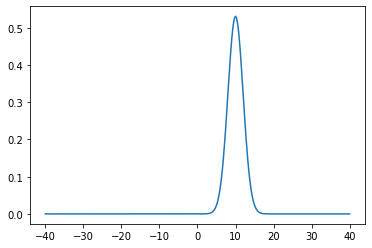

In [ ]:
def zac_stanje_ana(x):
    omega = 0.25
    lam = 10.
    alpha = np.sqrt(omega)
    zac_stanje = (omega / np.pi)**(1 / 4) * np.exp((-omega * ((x - lam)**2.) / 2.), dtype=complex)
    return zac_stanje

lam = 10.
k = 0.2**2
omega = np.sqrt(k)
alpha = np.sqrt(omega)

M = 1000
N = 300
x = np.linspace(-40, 40, N)
t = np.linspace(0, 20, M)

zac = zac_stanje_ana(x)
plt.plot(x, zac.real)
plt.show()

In [ ]:
def casovni_razvoj_ana(x, t):
    M = len(t)
    N = len(x)
    
    lam = 10.
    k = 0.2**2
    omega = np.sqrt(k)
    alpha = np.sqrt(omega)

    psi0 = zac_stanje_ana(x)
    psi = np.zeros((M, N), dtype=complex)

    n = (omega / np.pi)**(1 / 4)

    for i in range(M):
        for k in range(N):
            ksi = alpha * x[k]
            ksi_lam = alpha * lam

            psi[i, k] = np.sqrt(alpha / np.sqrt(np.pi)) * np.exp(-1/2 * (ksi - ksi_lam * np.cos(omega * t[i]))**2 - 1j * ( omega*t[i]/2 + ksi*ksi_lam*np.sin(omega * t[i]) - 1/4 * ksi_lam**2 * np.sin(2*omega*t[i])))

    return psi


M = 1000
N = 300
x = np.linspace(-40, 40, N)
t = np.linspace(0, 20, M)

psi = casovni_razvoj_ana(x, t)
psire = psi.real
psiim = psi.imag
psiabs = abs(psi)

In [ ]:
cmap = plt.get_cmap('cool', len(psi))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7.5, 7.5), sharex=True)

for i in range(len(psi)):
    axes[0].plot(x, (psire[i]), color=cmap(i), alpha=0.75)
    axes[1].plot(x, (psiim[i]), color=cmap(i), alpha=0.75)
    axes[2].plot(x, (psiabs[i]), color=cmap(i), alpha=0.75)

norm = matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

axes[0].set_ylabel('$\Re(Psi)$')
axes[1].set_ylabel('$\Im(Psi)$')
axes[2].set_ylabel('$|\Psi|$')
plt.xlabel('$x$')

plt.savefig(f'grafi/analiticna-casovni-razvoj.pdf')
plt.show()

NameError: name 'plt' is not defined

### Numericna resitev

In [ ]:
def V(x, k):
    return 0.5 * k * x**2.

def mat_A(N, x, delta_t, delta_x, k):
    #A = np.zeros((N, N), dtype=complex)
    b = 1j * delta_t / (2 * delta_x**2)
    a = -b / 2
    diag = np.zeros((3, N), dtype=complex)
    diag[0, :] = a
    diag[2, :] = a
    for i in range(N):
        Vj = V(x[i], k)
        dj = 1 + b + 1j * delta_t / 2 * Vj
        diag[1, i] = dj

    return sc.sparse.spdiags(diag, [-1, 0, 1], N, N, format='csr')

def casovni_razvoj_num(x, t):
    M = len(t)
    N = len(x)
    delta_x = x[1] - x[0]
    delta_t = t[1] - t[0]
    
    lam = 10.
    k = 0.2**2
    omega = np.sqrt(k)
    alpha = np.sqrt(omega)

    psi = np.zeros((M, N), dtype=complex)
    psi[0] = zac_stanje_ana(x)

    A = mat_A(N, x, delta_t, delta_x, k).toarray()
    #print(A)
    aiac = np.dot(np.linalg.inv(A), np.matrix.conjugate(A))
    for i in range(1, M):
        psi[i] = np.dot(aiac, psi[i-1])

    return psi



nihaji = 5
M = 1000 #* nihaji
N = 300
x = np.linspace(-40, 40, N)
t = np.linspace(0, 20, M)
psinum = casovni_razvoj_num(x, t)

psinumre = psinum.real
psinumim = psinum.imag
psinumabs = abs(psinum)

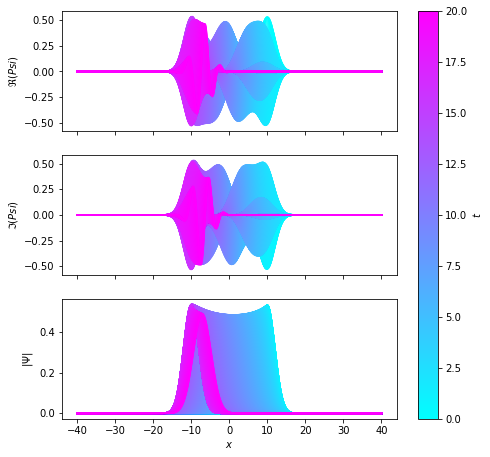

In [ ]:
cmap = plt.get_cmap('cool', len(psinum))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7.5, 7.5), sharex=True)

for i in range(len(psinum)):
    axes[0].plot(x, (psinumre[i]), color=cmap(i), alpha=0.75)
    axes[1].plot(x, (psinumim[i]), color=cmap(i), alpha=0.75)
    axes[2].plot(x, (psinumabs[i]), color=cmap(i), alpha=0.75)

norm = matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

axes[0].set_ylabel('$\Re(Psi)$')
axes[1].set_ylabel('$\Im(Psi)$')
axes[2].set_ylabel('$|\Psi|$')
plt.xlabel('$x$')

plt.savefig(f'grafi/num-casovni-razvoj.pdf')
plt.show()

### Primerjava
#### Težišče

In [ ]:
def povp(x, psi):
    M = psi.shape[0]
    avg_psi = np.zeros(M)
    for i in range(M):
        avg_psi[i] = x[np.argmax(np.abs(psi[i]))]
    return avg_psi

nihaji = 5
M = 1000 * nihaji
N = 300
x = np.linspace(-40, 40, N)
t = np.linspace(0, 2*np.pi/omega*nihaji, M)

psi_analiticna = casovni_razvoj_ana(x, t)
psi_numericna = casovni_razvoj_num(x, t)
povp_ana = povp(x, psi_analiticna)
povp_num = povp(x, psi_numericna)

povp_err = abs(povp(x, psi_numericna) - povp(x, psi_analiticna))

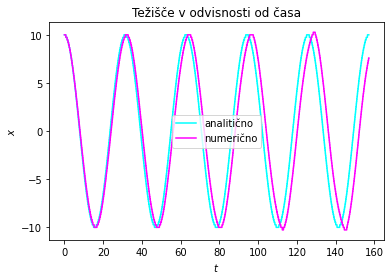

In [ ]:
plt.plot(t, povp_ana, color=cmap(0), label='analitično')
plt.plot(t, povp_num, color=cmap(len(t)), label='numerično')

plt.title('Težišče v odvisnosti od časa')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()

plt.savefig('grafi/povprecje-t.pdf')
plt.show()

#### Napaka $N$

In [ ]:
nspace = [100, 250, 500, 1000]
cmap = plt.get_cmap('cool', len(nspace))
nihaji = 1
errx = []
xi = []

for i in range(len(nspace)):

    M = 1000 * nihaji
    N = nspace[i]
    x = np.linspace(-40, 40, N)
    t = np.linspace(0, 2*np.pi/omega*nihaji, M)

    psi_analiticna = casovni_razvoj_ana(x, t)
    psi_numericna = casovni_razvoj_num(x, t)

    errx.append(abs(abs(psi_analiticna[-1]) - abs(psi_numericna[-1])))
    xi.append(x)

    print(N)

100
250
500
1000


100
250
500
1000


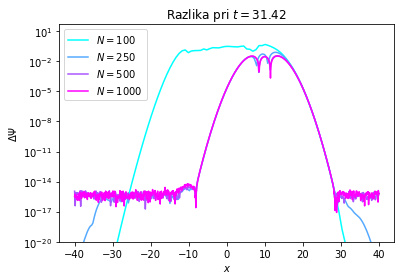

In [ ]:
for i in range(len(nspace)):
    plt.plot(xi[i], errx[i], color=cmap(i), label=f'$N={nspace[i]}$')
    print(nspace[i])

plt.title(f'Razlika pri $t={round(t[-1], 2)}$')
plt.xlabel('$x$')
plt.ylabel('$\Delta \Psi$')
plt.yscale('log')
plt.legend()
plt.ylim(10**(-20))

plt.savefig('grafi/napaka-x.pdf')
plt.show()

#### Ploščina

In [ ]:
def ploscina(x, psi):
    ploscina = np.zeros(psi.shape[0])
    M = len(psi)
    delta_x = x[1] - x[0]

    for i in range(M):
        ploscina[i] = np.sum(np.abs(psi[i])) * delta_x**2

    return ploscina
    

nihaji = 5
M = 1000 * nihaji
N = 300
x = np.linspace(-40, 40, N)
t = np.linspace(0, 2*np.pi/omega*nihaji, M)

psi_analiticna = casovni_razvoj_ana(x, t)
psi_numericna = casovni_razvoj_num(x, t)

pl_ana = ploscina(x, psi_analiticna)
pl_num = ploscina(x, psi_numericna)

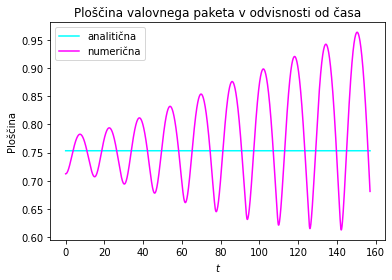

In [ ]:
plt.plot(t, pl_ana, color=cmap(0), label='analitična')
plt.plot(t, pl_num, color=cmap(len(nspace)), label='numerična')

plt.title('Ploščina valovnega paketa v odvisnosti od časa')
plt.xlabel('$t$')
plt.ylabel('Ploščina')
plt.legend()

plt.savefig('grafi/ploscina-t.pdf')
plt.show()

## Prost GVP

In [ ]:
sig0 = 1 / 20
k0 = 50 * np.pi
lam = 0.25
xi = -0.5
xf = 1.5

def prost_zac(x):
    sig0 = 1 / 20
    k0 = 50 * np.pi
    lam = 0.25
    return (2 * np.pi * sig0**2)**(-1/4) * np.exp(1j * k0 * (x-lam)) * np.exp(-(x-lam)**2 / (2 * sig0)**2)

def prost_ana(x, t):
    sig0 = 1 / 20
    k0 = 50 * np.pi
    lam = 0.25
    N = len(x)
    M = len(t)
    psi = np.zeros((M, N), dtype=complex)

    for m in range(M):
        for n in range(N):
            psi[m, n] = (2*np.pi*sig0**2)**(-1/4) / np.sqrt(1 + 1j * t[m] / (2*sig0**2)) * np.exp(
                (-(x[n] - lam)**2 / (2*sig0)**2 + 1j * k0 * (x[n]-lam) - 1j * k0**2 * t[m] / 2) /
                (1 + 1j * t[m] / (2*sig0**2))
            )

    return psi

tf = 3.5e-3
N = 1000
x = np.linspace(xi, xf, N)
delta_x = x[1] - x[0]
delta_t = 2 * delta_x**2
t = np.arange(0, tf, delta_t)


psi = prost_ana(x, t)
psire = psi.real
psiim = psi.imag
psiabs = abs(psi)

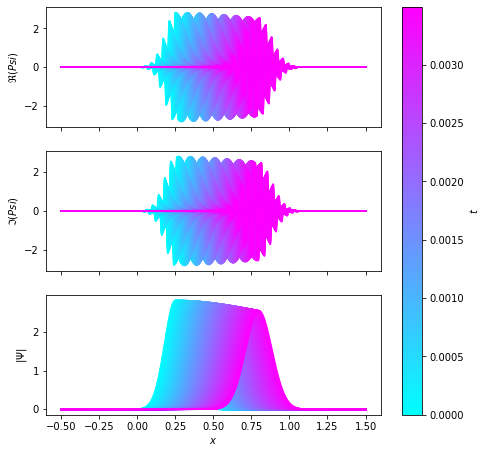

In [ ]:
cmap = plt.get_cmap('cool', len(psi))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7.5, 7.5), sharex=True)

for i in range(len(psi)):
    axes[0].plot(x, (psire[i]), color=cmap(i), alpha=0.75)
    axes[1].plot(x, (psiim[i]), color=cmap(i), alpha=0.75)
    axes[2].plot(x, (psiabs[i]), color=cmap(i), alpha=0.75)

norm = matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

axes[0].set_ylabel('$\Re(Psi)$')
axes[1].set_ylabel('$\Im(Psi)$')
axes[2].set_ylabel('$|\Psi|$')
plt.xlabel('$x$')

plt.savefig(f'grafi/analiticna-casovni-bp.pdf')
plt.show()

In [ ]:
def mat_A_bp(N, x, delta_t, delta_x, k):
    b = 1j * delta_t / (2 * delta_x**2)
    a = -b / 2
    diag = np.zeros((3, N), dtype=complex)
    diag[0, :] = a
    diag[2, :] = a
    for i in range(N):
        dj = 1 + b
        diag[1, i] = dj

    return sc.sparse.spdiags(diag, [-1, 0, 1], N, N, format='csr')

def prost_num(x, t):
    M = len(t)
    N = len(x)
    delta_x = x[1] - x[0]
    delta_t = t[1] - t[0]
    
    sig0 = 1 / 20
    k0 = 50 * np.pi
    lam = 0.25
    k = 0.2**2
    omega = np.sqrt(k)
    alpha = np.sqrt(omega)

    psi = np.zeros((M, N), dtype=complex)
    psi[0] = prost_zac(x)

    A = mat_A_bp(N, x, delta_t, delta_x, k0).toarray()
    #print(A)
    aiac = np.dot(np.linalg.inv(A), np.matrix.conjugate(A))
    for i in range(1, M):
        psi[i] = np.dot(aiac, psi[i-1])

    return psi


tf = 3.5e-3
N = 1000
x = np.linspace(xi, xf, N)
delta_x = x[1] - x[0]
delta_t = 2 * delta_x**2
t = np.arange(0, tf, delta_t)
psinum = prost_num(x, t)

psinumre = psinum.real
psinumim = psinum.imag
psinumabs = abs(psinum)

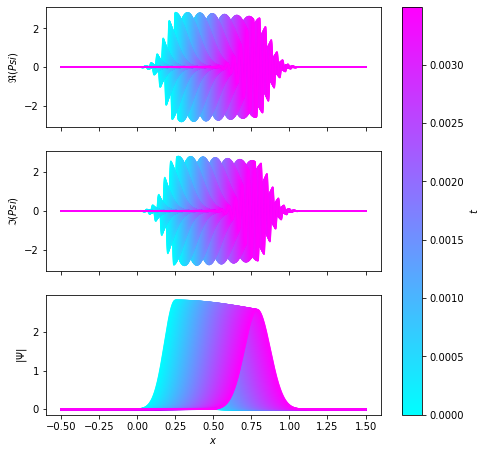

In [ ]:
cmap = plt.get_cmap('cool', len(psinum))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7.5, 7.5), sharex=True)

for i in range(len(psinum)):
    axes[0].plot(x, (psinumre[i]), color=cmap(i), alpha=0.75)
    axes[1].plot(x, (psinumim[i]), color=cmap(i), alpha=0.75)
    axes[2].plot(x, (psinumabs[i]), color=cmap(i), alpha=0.75)

norm = matplotlib.colors.Normalize(vmin=t[0], vmax=t[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

axes[0].set_ylabel('$\Re(Psi)$')
axes[1].set_ylabel('$\Im(Psi)$')
axes[2].set_ylabel('$|\Psi|$')
plt.xlabel('$x$')

plt.savefig(f'grafi/num-casovni-bp.pdf')
plt.show()

### Primerjava

#### Težišče

In [ ]:
psi_analiticna = prost_ana(x, t)
psi_numericna = prost_num(x, t)
povp_ana = povp(x, psi_analiticna)
povp_num = povp(x, psi_numericna)

povp_err = abs(povp(x, psi_numericna) - povp(x, psi_analiticna))

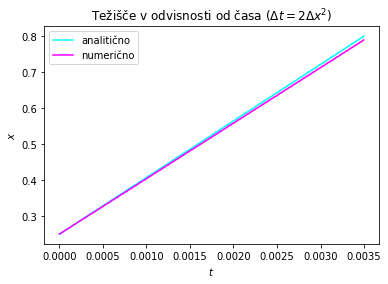

In [ ]:
plt.plot(t, povp_ana, color=cmap(0), label='analitično')
plt.plot(t, povp_num, color=cmap(len(t)-1), label='numerično')

plt.title('Težišče v odvisnosti od časa ($\Delta t = 2\Delta x^2$)')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()

plt.savefig('grafi/tezisce-prost.pdf')
plt.show()

#### Ploščina

In [ ]:
pl_ana = ploscina(x, psi_analiticna)
pl_num = ploscina(x, psi_numericna)

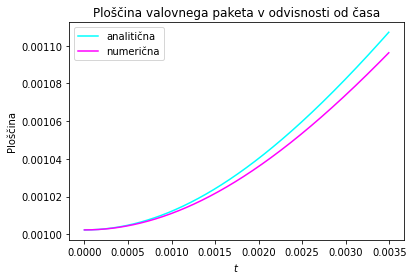

In [ ]:
plt.plot(t, pl_ana, color=cmap(0), label='analitična')
plt.plot(t, pl_num, color=cmap(len(t)), label='numerična')

plt.title('Ploščina valovnega paketa v odvisnosti od časa')
plt.xlabel('$t$')
plt.ylabel('Ploščina')
plt.legend()

plt.savefig('grafi/ploscina-prost.pdf')
plt.show()

#### Napaka $N$

In [ ]:
nspace = [100, 250, 500, 1000, 2000]
cmap = plt.get_cmap('cool', len(nspace))
errx = []
xs = []
xi = -0.5
xf = 1.5
tf = 3.5e-3

for i in range(len(nspace)):
    
    N = nspace[i]
    x = np.linspace(xi, xf, N)
    delta_x = x[1] - x[0]
    delta_t = 2. * delta_x**2.
    t = np.arange(0, tf, delta_t)

    psi_analiticna = prost_ana(x, t)
    psi_numericna = prost_num(x, t)

    errx.append(abs(abs(psi_analiticna[-1]) - abs(psi_numericna[-1])))
    xs.append(x)

    print(N)

100
250
500
1000
2000


100
250
500
1000
2000


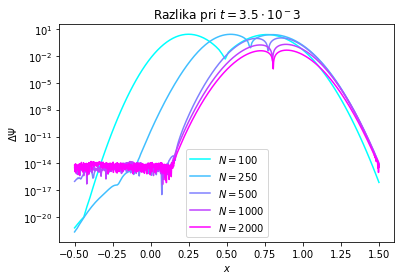

In [ ]:
for i in range(len(nspace)):
    plt.plot(xs[i], errx[i], color=cmap(i), label=f'$N={nspace[i]}$')
    print(nspace[i])

plt.title(f'Razlika pri $t = 3.5\cdot10^{-3}$')
plt.xlabel('$x$')
plt.ylabel('$\Delta \Psi$')
plt.yscale('log')
plt.legend()
#plt.ylim(10**(-20))

plt.savefig('grafi/napaka-x-prost.pdf')
plt.show()

#### Ploščina daleč

In [ ]:
xf = 3
tf = 2e-2
N = 1000
x = np.linspace(xi, xf, N)
delta_x = x[1] - x[0]
delta_t = 2 * delta_x**2
t = np.arange(0, tf, delta_t)

psi_analit = prost_ana(x, t)
psi_numer = prost_num(x, t)

plo_an = ploscina(x, psi_analit)
plo_nu = ploscina(x, psi_numer)

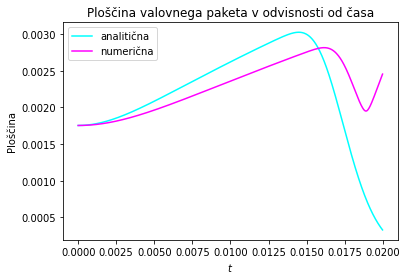

In [ ]:
plt.plot(t, plo_an, color=cmap(0), label='analitična')
plt.plot(t, plo_nu, color=cmap(625), label='numerična')

plt.title('Ploščina valovnega paketa v odvisnosti od časa')
plt.xlabel('$t$')
plt.ylabel('Ploščina')
plt.legend()

plt.savefig('grafi/ploscina-prost-dolgt.pdf')
plt.show()